In [18]:
import pandas as pd
import glob

# Path to the folder containing the test_seq_ files
folder_path = 'data_3.1/'

# Locate all test_seq_ files in the folder
file_paths = glob.glob(f'{folder_path}/test_seq_*.csv')

# Load all files into a list of DataFrames
dfs = [pd.read_csv(file) for file in file_paths]

# Concatenate all DataFrames into a single DataFrame
data = pd.concat(dfs, ignore_index=True)

# Display the merged DataFrame
data.head()

#merged_df.to_csv('merged_test_seq_data.csv', index=False)


,Trial,Ping Duration,Distance (cm),Ping Time (us),Delay,Arduino ID,Sensor ID,Range (cm),Sensor length (cm),Color of sensor,Angle on XY plane,side a (cm),side b (cm),side c (cm),Angle on YZ plane,Sensor Configuration,Sensor Angle,Surface material,Surface Length (cm),Surface Width (cm)
0,0,3464,14,847,400 us,3,4,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3460,15,855,400 us,3,4,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3456,15,855,400 us,3,4,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3460,15,855,400 us,3,4,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3460,15,855,400 us,3,4,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Convert the Delay column to numerical values (e.g., '400 us' to 400)
data['Delay'] = data['Delay'].str.replace(' us', '').astype(int)

# Filter relevant columns for analysis
relevant_columns = ['Ping Time (us)', 'Delay', 'Arduino ID', 'Sensor ID']
cleaned_data = data[relevant_columns]

# Check for any missing values
missing_values = cleaned_data.isnull().sum()

cleaned_data.head(), missing_values


(   Ping Time (us)  Delay  Arduino ID  Sensor ID
 0             847    400           3          4
 1             855    400           3          4
 2             855    400           3          4
 3             855    400           3          4
 4             855    400           3          4,
 Ping Time (us)    0
 Delay             0
 Arduino ID        0
 Sensor ID         0
 dtype: int64)

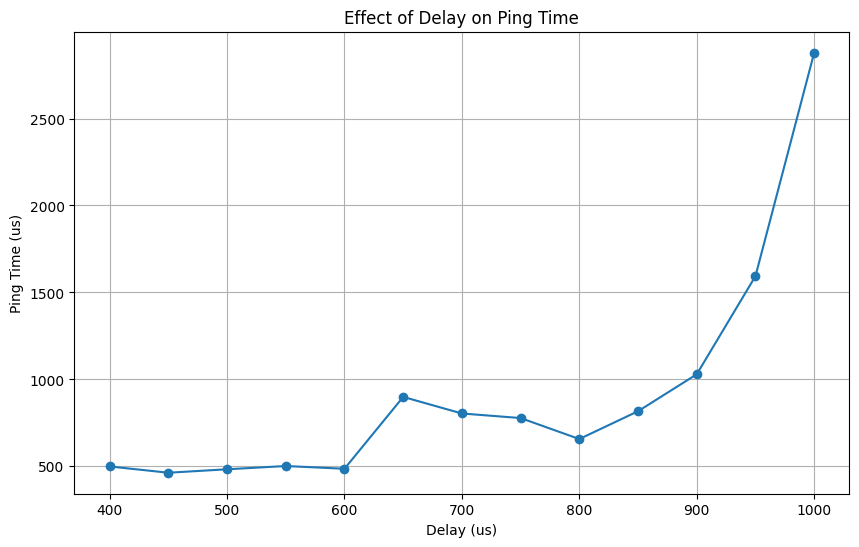

In [24]:
import matplotlib.pyplot as plt

# Extract relevant columns
data_cleaned = data[['Delay', 'Ping Time (us)']].dropna()


# Group by delay and calculate the mean ping time for each delay value
grouped_data_ping = data_cleaned.groupby('Delay').mean().reset_index()

# Plotting the relationship between delay and ping time
plt.figure(figsize=(10, 6))
plt.plot(grouped_data_ping['Delay'], grouped_data_ping['Ping Time (us)'], marker='o', linestyle='-')
plt.title('Effect of Delay on Ping Time')
plt.xlabel('Delay (us)')
plt.ylabel('Ping Time (us)')
plt.grid(True)
plt.show()


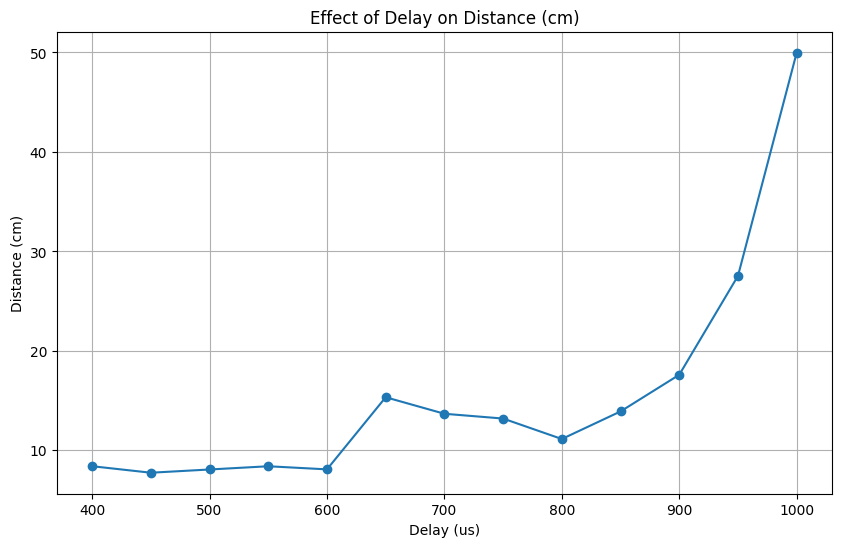

In [25]:
import matplotlib.pyplot as plt

# Extract relevant columns
data_cleaned = data[['Delay', 'Distance (cm)']].dropna()


# Group by delay and calculate the mean ping time for each delay value
grouped_data_dist = data_cleaned.groupby('Delay').mean().reset_index()

# Plotting the relationship between delay and ping time
plt.figure(figsize=(10, 6))
plt.plot(grouped_data_dist['Delay'], grouped_data_dist['Distance (cm)'], marker='o', linestyle='-')
plt.title('Effect of Delay on Distance (cm)')
plt.xlabel('Delay (us)')
plt.ylabel('Distance (cm)')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

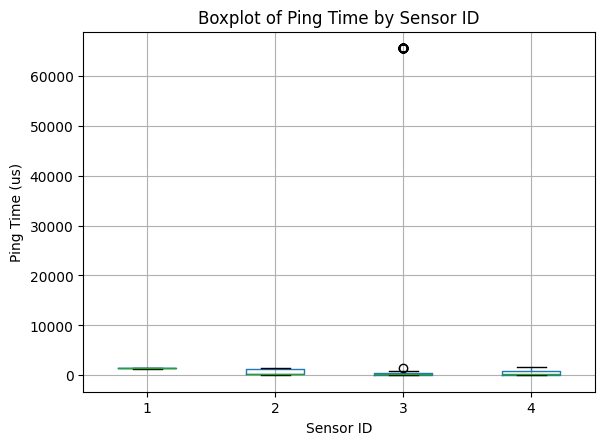

<Figure size 1200x600 with 0 Axes>

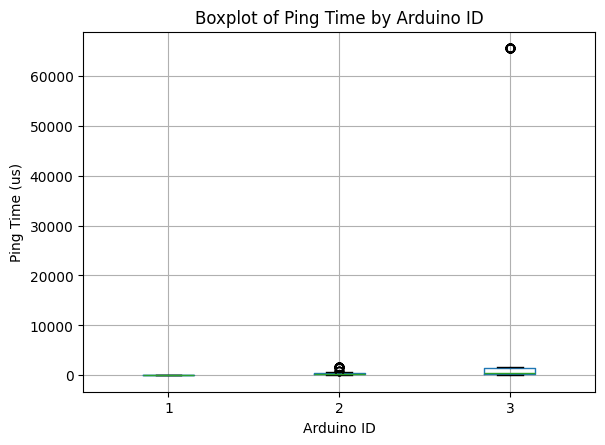

In [27]:
# Create boxplots for Ping Time for each Sensor ID and Arduino ID

# Boxplot for each Sensor ID
plt.figure(figsize=(12, 6))
data.boxplot(column='Ping Time (us)', by='Sensor ID', grid=True)
plt.title('Boxplot of Ping Time by Sensor ID')
plt.suptitle('')
plt.xlabel('Sensor ID')
plt.ylabel('Ping Time (us)')
plt.show()

# Boxplot for each Arduino ID
plt.figure(figsize=(12, 6))
data.boxplot(column='Ping Time (us)', by='Arduino ID', grid=True)
plt.title('Boxplot of Ping Time by Arduino ID')
plt.suptitle('')
plt.xlabel('Arduino ID')
plt.ylabel('Ping Time (us)')
plt.show()
